## Jupyter

Мы в основном будем пользоваться Jupyter Notebooks. Это довольно удобная интерактивная среда, в которой вы можете сразу видеть результаты ваших действий.
Для каждого "блокнота" запускается ядро (kernel), в котором хранится текущее состояние интерпретатора питона: значения всех глобальных переменных, определенных функций, импортированных пакетов.
Код разбит на блоки, которые могут выполняться независимо (необязательно по порядку), при этом состояние ядра соответствующим образом меняется.

Задача (бесполезная). Выполняйте эти блоки в каком-нибудь порядке, чтобы последний блок в итоге выдал 19

In [46]:
x = 10
y = 1
print(x, y)

In [50]:
x += y
y += 1
print(x, y)

In [49]:
x += 20
x //= y
print(x, y)

In [51]:
print(x)

19


Jupyter выводит результат в двух случаях: если вы явно вызываете команду print или если результат последней операции ничему не присваивается

In [55]:
x = 3 
x + 2 #будет показано

5

In [57]:
x = 3
y = x + 2 #не будет показано

Если вы не хотите видеть результат последнего вызова, можно поставить после него ; 

In [56]:
x + 2; #не будет показано

Про любую функцию можно прочитать help, если поставить после нее вопросительный знак:

In [58]:
print?

### Numpy. Массивы и не только

Для работы с данными в Питоне обычно используют несколько другой инструментарий, чем вы привыкли, если изучали для решения алгоритмических задач. Один из основных пакетов, с которым вам нужно познакомиться называется numpy (от numeric python). Исходно он создавался для того, чтобы предоставить эффективную с точки зрения производительности возможность решать различные вычислительные задачи. Мы познакомимся с довольно узким подмножеством этого пакета, полезно будет когда-нибудь потратить чуть больше времни, чтобы изучить другие его возможности.


Традиционно принято импортировать этот модуль под именем np:

In [5]:
import numpy as np

Вы можете набрать np. и нажать табуляцию, Jupyter покажет вам возможные продолжения -- то, что есть внутри этого модуля. Вы можете набрать команду и поставить после нее вопросительный знак, тогда Jupyter покажет вам описание этой команды, например вот так:

In [3]:
np.abs?

Часто это очень хороший способ найти команду, если вы точно не уверены, как она называется, но думаете, что в numpy наверняка есть такая команда. Надо только угадать первую букву ;)

In [ ]:
Нас в первую очередь будут интересовать массивы, которые в numpy называются np.array:

In [6]:
np.array([1, 2, 3])

array([1, 2, 3])

In [ ]:
Основное отличие массивов в numpy от обычных списков в том, что они ведут себя скорее как векторы в геометрии, например их можно складывать

In [16]:
np.array([1, 2, 3])  +  np.array([2, 3, 4])

array([3, 5, 7])

In [ ]:
Умножать на число

In [17]:
3 * np.array([1,2,3])

array([3, 6, 9])

In [ ]:
Можно даже умножать два массива один на другой, если в них одинаковое число элементов:

In [18]:
np.array([1, 2, 3]) * np.array([2, 3, 4])

array([ 2,  6, 12])

Обратите внимание, что массивы перемножаются поэлементно. Возможно вы ожидали увидеть другой результат: скалярное произведение этих векторов. Чтобы получить его нужно воспользоваться функцией dot (по-английски скалярное произведение часто называют dot-product из-за распространенного обозначения a.b)

In [26]:
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
a.dot(b) # == 1 * 2 + 2 * 3 + 3 * 4

20

Numpy поддерживает и умножение матриц (если вы не знаете, что это такое, это не страшно. В начале на это не понадобится, а сли вдруг понадобится -- мы про него расскажем):

In [45]:
a = np.array([[0.5, 0.5 * 3 ** 0.5], [0.5 * 3 ** 0.5, -0.5]]) #rotate 60
b = np.array([[-0.5 * 3 ** 0.5, 0.5], [0.5, 0.5 * 3 ** 0.5]]) # rotate 30
a @ b # rotate 90

array([[ 0.,  1.],
       [-1.,  0.]])

Помимо сказанного про массивы в numpy полезно  знать еще несколько вещей.
Во-первых, индексы и слайсы для массивов работают не совсем так, как в обычном Питоне: можно не только задавать слайс, но и выбирать отдельные элементы по номерам: 

In [49]:
a = np.array([1, 2, 3, 4, 5])
print(a[1:3])
print(a[[1,3,4]])

[2 3]
[2 4 5]


Еще один способ индексировать массивы в numpy -- битовой маской. Можно использовать в качестве индекса массив типа boolean, длина которого равна длине исходного. Останутся те элементы, для которых в массиве стояло True

In [100]:
a = np.array([1, 2, 3, 4, 5])
print(a[[True, True, False, False, True]]) # == a[[0, 1, 4]]

[1 2 5]


Задача: как из массива а сделать новый массив, состоящий только из положительных элементов в массиве а? Numpy позволяет сделать это в одну строку

In [14]:
a = np.random.random(10) - 0.5
print(a)
b = ???
print(b)

[-0.46078809 -0.4211262  -0.29856676 -0.44303585 -0.29932943 -0.49097852
 -0.13025682  0.0035806   0.32186178 -0.22237509]
[0.0035806  0.32186178]


Больше того, если для обычного списка в Питоне вы копируете слайс, то делается (shallow) копия, то для np.array создается view в исходном массиве. Мы сейчас не будем углубляться в то, что это значит. Можно считать, что элементы в слайсе -- это в точности элементы исходного массива, если вы их меняете они изменятся и в исходном массиве тоже.

In [235]:
a = [1, 2, 3, 4]
b = a[1:3]
b[0] = 10
print(a, b)

[1, 2, 3, 4] [10, 3]


In [238]:
a = np.array([1, 2, 3, 4])
b = a[1:3]
b[0] = 10
print(a, b)

[ 1 10  3  4] [10  3]


Еще одна вещь, очень удобная при работе np.array -- к ним очень легко применять функцию, если ее надо применить ко всем элементам. Правда функция должна знать про такую возможность, поэтому нужно брать функции не из math, а из numpy:

In [77]:
import math
a = np.array([1, 2, 3, 4])
print(np.sin(a * math.pi / 6))
print(math.sin(a * math.pi / 6)) # generates error

[0.5       0.8660254 1.        0.8660254]


TypeError: only size-1 arrays can be converted to Python scalars

Это будет работать почти со всеми встроенными функциями Питона: сравнения, возведение в степень, модуль.

Есть удобное сокращение для np.array(range(left, right, step)):

In [118]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
Но часто поведение range не включающего правую границу оказывается неудобным. Для таких случаев есть 

In [119]:
np.linspace(0, 1, 21) # последнее число -- количество точек, которые должны получиться

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [ ]:
Массивы могут быть многомерными:

In [7]:
a = np.array([[[1,2,3], [4,5,6]], [[7,8,9], [10,11,12]]])
a

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [ ]:
Можно узнать размерность массива по каждому измерению:

In [9]:
a.shape

(2, 2, 3)

In [ ]:
Еще полезные функции создают массив, заполненный нулями и заполненный единицами:

In [11]:
np.zeros(5), np.ones((2,3))

(array([0., 0., 0., 0., 0.]), array([[1., 1., 1.],
        [1., 1., 1.]]))

In [ ]:
Иногда надобится создать массив "такой же, но заполненный нулями":

In [13]:
b = np.zeros(a.shape)
b

array([[[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]]])

Еще полезные функции, которые есть в модуле numpy: np.max, np.min, np.mean, np.all, np.any и многие другие.

Если вам интересно вот тут можно посмотреть на забавные задачи с numpy и узнать много нового
https://github.com/rougier/numpy-100

## Matplotlib

matplotlib -- библиотека для рисования графиков. Она создавалась для того чтобы повторить в Питоне интерфейс рисования графиков в Matlab, но стала одним из очень популярных стандартных средств в питоне.

In [110]:
%matplotlib inline
#Это специальная "магия" Jupyter которая настраивает matplotlib так, чтобы графики создавались внутри вашего notebook
from matplotlib import pyplot as plt #и снова, это общепринятое имя, все пишут этот import именно так.

In [ ]:
В самом базовом варианте строится график функции, заданной своими значениями. Функция plot принимает 

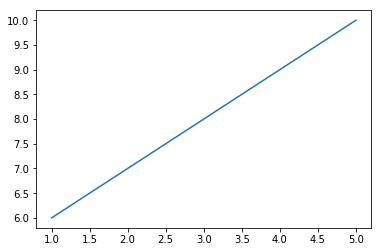

In [120]:
plt.plot([1,2,3,4,5], [6, 7, 8, 9, 10])

In [ ]:
Можно нарисовать несколько графиков, просто последовательно вызвав несколько раз команду рисования:

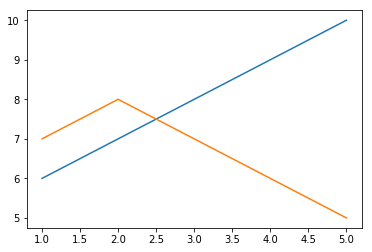

In [122]:
plt.plot([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])
plt.plot([1, 2, 3, 4, 5], [7, 8, 7, 6, 5])


In [ ]:
Цвета выбираются автоматически, но при желании их можно указать вручную:

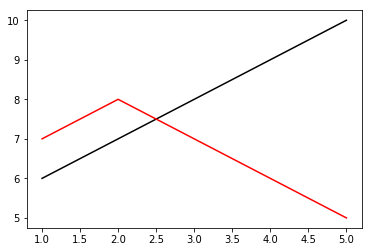

In [129]:
plt.plot([1, 2, 3, 4, 5], [6, 7, 8, 9, 10], c='black')
plt.plot([1, 2, 3, 4, 5], [7, 8, 7, 6, 5], c='r')


Библиотека также позволяет указать подписи к осям, описание отдельных графиков и многое другое попробуйте прочитать мануал и самостоятельно разобраться как это сделать:


In [ ]:
plt.plot([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])
plt.plot([1, 2, 3, 4, 5], [7, 8, 7, 6, 5])

#Добавьте названия осей и легенду к каждому графику

In [123]:
В качестве координат можно задавать numpy массивы, часто это гораздо удобнее:

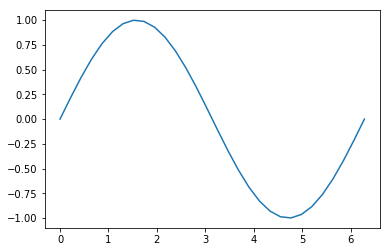

In [126]:
a = np.linspace(0, 2 * np.pi, 30)
plt.plot(a, np.sin(a))

Задание: напишите функцию, которая берет на вход функцию f, границы x_min, x_max, количество точек и строит соответствующий график.

In [ ]:
def plot_function(f, x_min, x_max, steps):
    pass

plot_function(math.sin, 0, 2 * math.pi, 30)

In [ ]:
Еще одним очень полезным видом графика является scatter plot -- просто изображение множества точек с заданными координатами на плоскости:

In [150]:
a = np.random.normal(0, 1, 10) #10 случайных значений из нормального распределения со средним 0 и дисперсией 1
b = np.random.normal(0, 1, 10) #еще 10 случайных значений из нормального распределения со средним 0 и дисперсией 1


Задание.
Скорее всего то, что получилось не выглядит как изображение нормального распределения.
Чтобы сделать картинку более соответвующей стоит

1) Увеличить количество точек

2) сделать их прозрачными (этим управвляет параметр alpha)

3) сделать график квадратным (почитайте help про plt.figure)

Еще один очень полезный тип графиков -- гистограмма, которая показывает, насколько часто встречается каждое значени: область значений разбивается на несколько интервалов (бинов, bins) и для каждого считается, сколько значений из массива туда попало:

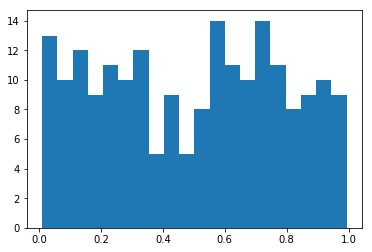

In [259]:
a = np.random.random(200)
ax = plt.hist(a, bins=20)

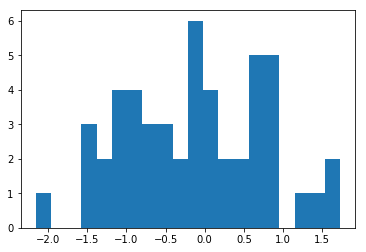

In [256]:
a = np.random.normal(0, 1, 50)
ax = plt.hist(a, bins=20)

Задание: поэкспериментируйте с количеством бинов и количеством точек в массиве и посмотрите как график приближается к колоколообразной кривой

Мы еще вернемся к рисованию разных графиков, но чтобы нам было что рисовать, давайте познакомимся с некоторыми датасетами

## Datasets, Pandas, advanced plotting

В пакете sklearn.datasets есть несколько примеров "игрушечных" датасетов

In [153]:
import sklearn.datasets

In [158]:
iris = sklearn.datasets.load_iris()

In [159]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [160]:
print(iris['data'], columns = 'slength')

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

В принципе, ничего не мешает вам хранить ваши данные в виде np.array и самостоятельно разбираться, как с ними работать (я, например, часто так и поступаю). Но иногда удобно использовать более верхнеуровневую библиотеку, которая существенную часть организации данных выполнит за вас.
Наиболее популярная библиотека такого типа для питона называется pandas (панды!) и обычно импортируется так

In [152]:
import pandas as pd

In [ ]:
Мы создадим DataFrame -- это основная структура в pandas, содержащий все данные. Заголовки для столбцов мы возьмем из описания

In [207]:
data = pd.DataFrame(iris['data'], columns = iris['feature_names'])

In [208]:
print(data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
5                  5.4               3.9                1.7               0.4
6                  4.6               3.4                1.4               0.3
7                  5.0               3.4                1.5               0.2
8                  4.4               2.9                1.4               0.2
9                  4.9               3.1                1.5               0.1
10                 5.4               3.7                1.5               0.2
11                 4.8               3.4                1.6     

In [ ]:
Мы можем брать отдельные столбцы, или несколько отдельных столбцов:

In [210]:
data['sepal length (cm)']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     4.3
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
19     5.1
20     5.4
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
28     5.2
29     4.7
      ... 
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [212]:
data[['sepal length (cm)', 'sepal width (cm)']]

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


In [ ]:
Мы можем легко построить scatter plot, показывающий, как распределены эти два параметра:

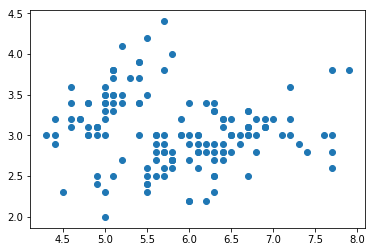

In [213]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'])

In [ ]:
Но pandas позволяют сделать это чуть более удобно (некоторые считают, что это менее удобно, к счастью, у вас всегда есть выбор):

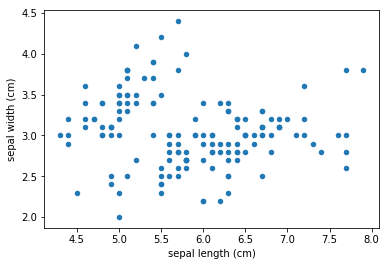

In [216]:
data.plot(kind='scatter', x=0, y=1) #можно писать x='sepal length (cm)', но в данном случае это слишком громоздко

Здесь нарисованы все точки датасета. Но нам хотелось бы увидеть, где какой тип ирисов. Это довольно легко сделать, в данных есть тип, он лежит в iris['target']. Нам будет удобнее дописать его к нашему DataFrame, тем более pandas позволяет это очень легко сделать:


In [219]:
data['target'] = iris['target']

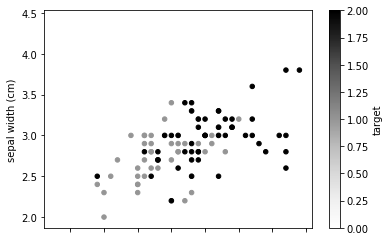

In [220]:
data.plot(kind='scatter', x=0, y=1, c='target')


Параметр c управляет цветом точек. К сожалению, по умолчанию включается довольно неудобная черно-белая палитра, но это легко поправть

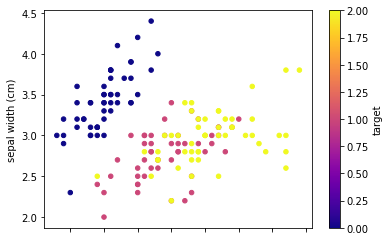

In [221]:
data.plot(kind='scatter', x=0, y=1, c='target', colormap='plasma')

In [ ]:
Этот график показывает нам распределение двух параметров, но уже тут видно, что один из типов цветов хорошо отличается по ним.
Давайте посмотри всевозможные попарные распределения:

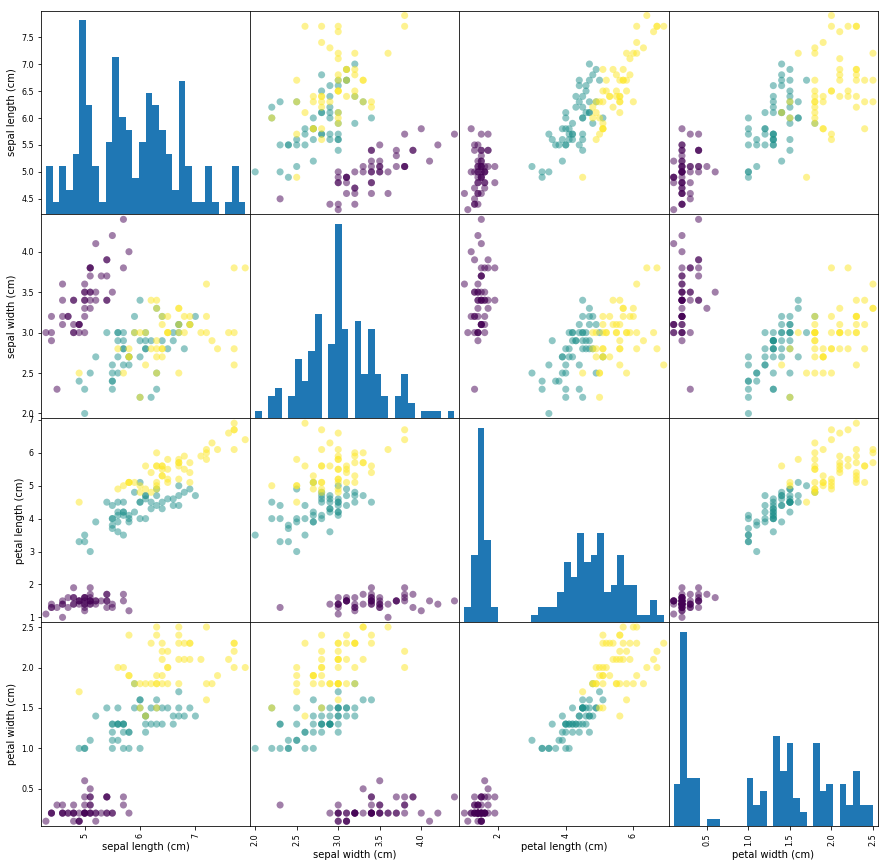

In [234]:
r = pd.plotting.scatter_matrix(data[iris['feature_names']], c=data['target'], figsize=(15,15), s=200, hist_kwds={'bins' : 30})

Задание: поразвлекайтесь с предыдущим графиком, разберитесь, за что отвечают разные параметры.

В общем уже видно, что указанные параметры довольно неплохо различают виды ирисов. 

Задание: Попробуйте придумать функцию от четырех переменных, которая получает на вход характеристики цветка, а на выходе дает его тип (потом мы с вами будем учиться заставлять компьютер делать это самостоятельно, но для начала полезно попробовать самим)

Задание: попробуйте точно так же посмотреть на датасет про вино (sklearn.datasets.load_wine())

Еще интересные примеры использования pandas и numpy можно посмотреть тут https://github.com/graf-vk/universum-ml/blob/master/1.1%20Pandas%20%2B%20Titanic.ipynb